In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier






# I. Read dataset

In [4]:
df_encoded=pd.read_csv('04_df_encoded_wonlost.csv', delimiter=',')
df_encoded.head()

,Amount_DE,Amount_HD,Amount_ID,Amount_OTHER,Amount_PP,Amount_PS,Amount_SP,Total_Amount,Resolution_time,Client_type,Market_segment,Client_BU,Country,Client_importance,Coverage_model,Result_offer_binary
0,0.001945,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000718,0.078611,0.456166,1037,3473,1,3,6,0
1,0.002045,0.0,0.1,0.0,0.02803,0.020478,0.0,0.021526,0.235466,0.456166,137,2861,1,3,6,1
2,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.032176,0.456166,248,3473,1,3,6,0
3,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.025229,0.456166,248,3473,1,3,6,0
4,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.025229,0.456166,248,3473,1,3,6,0


# ML models Training - Comparison

## 1. Split

In [5]:
# Define predictors (X) and target (y)
X = df_encoded.drop(columns=['Result_offer_binary'])
y = df_encoded['Result_offer_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 2. Training

### Logistic regresion

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.45      0.50      1625
           1       0.67      0.76      0.71      2356

    accuracy                           0.64      3981
   macro avg       0.62      0.61      0.61      3981
weighted avg       0.63      0.64      0.63      3981


Accuracy: 0.6352675207234363

ROC AUC Score: 0.6733993731226329

Confusion Matrix:
[[ 733  892]
 [ 560 1796]]


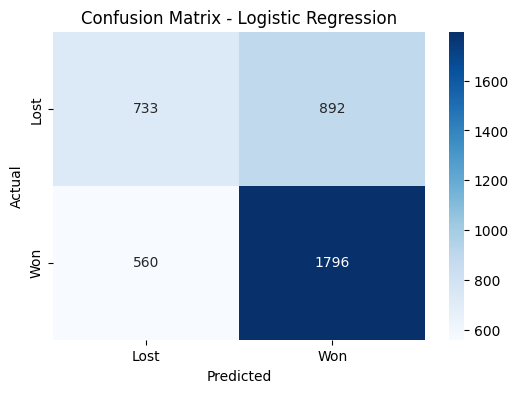

In [6]:
#Logistic regression

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter for convergence
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Decision tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1625
           1       0.75      0.75      0.75      2356

    accuracy                           0.71      3981
   macro avg       0.70      0.70      0.70      3981
weighted avg       0.71      0.71      0.71      3981


Accuracy: 0.7068575734740015

ROC AUC Score: 0.6961413086065038

Confusion Matrix:
[[1038  587]
 [ 580 1776]]


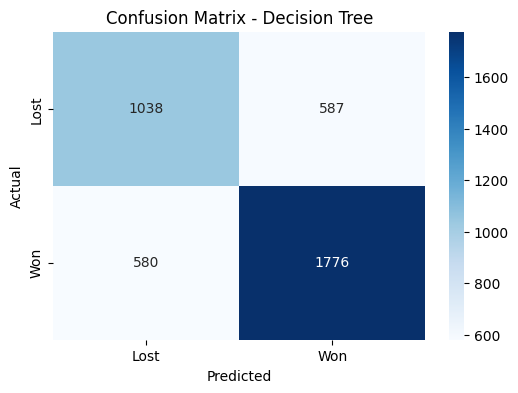

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_predictions = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nAccuracy:", dt_accuracy)

# ROC AUC Score
dt_roc_auc = roc_auc_score(y_test, dt_pred_prob)
print("\nROC AUC Score:", dt_roc_auc)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("\nConfusion Matrix:")
print(dt_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Random forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      1625
           1       0.78      0.87      0.82      2356

    accuracy                           0.77      3981
   macro avg       0.77      0.75      0.76      3981
weighted avg       0.77      0.77      0.77      3981


Accuracy: 0.7741773423762873

ROC AUC Score: 0.8482619824996736

Confusion Matrix:
[[1043  582]
 [ 317 2039]]


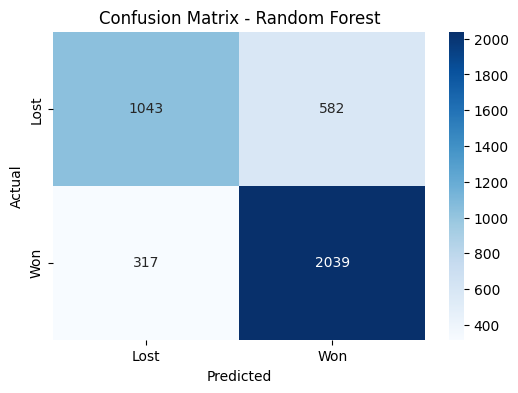

In [8]:
# Random Forest

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("\nAccuracy:", accuracy)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_pred_prob)
print("\nROC AUC Score:", roc_auc)


# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(rf_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



### Light GBM

[LightGBM] [Info] Number of positive: 5497, number of negative: 3789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 9286, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.591966 -> initscore=0.372100
[LightGBM] [Info] Start training from score 0.372100
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1625
           1       0.77      0.89      0.82      2356

    accuracy                           0.78      3981
   macro avg       0.78      0.75      0.76      3981
weighted avg       0.78      0.78      0.77      3981


Accuracy: 0.7754333082140166

ROC AUC Score: 0.8243992425231814

Confusion Matrix:
[[ 9

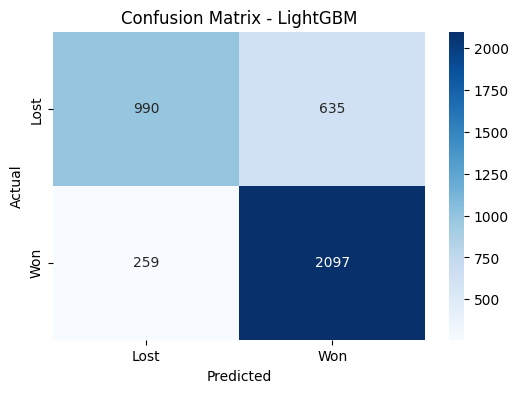

In [9]:
#LIGHTGBM

# Train a LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict and evaluate
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_predictions))

# Accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("\nAccuracy:", lgbm_accuracy)

# ROC AUC Score
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_prob)
print("\nROC AUC Score:", lgbm_roc_auc)

# Confusion Matrix
lgbm_cm = confusion_matrix(y_test, lgbm_predictions)
print("\nConfusion Matrix:")
print(lgbm_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

### XGBoost

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71      1625
           1       0.78      0.88      0.83      2356

    accuracy                           0.78      3981
   macro avg       0.78      0.76      0.77      3981
weighted avg       0.78      0.78      0.78      3981


Accuracy: 0.7814619442351168

ROC AUC Score: 0.8337395846937444

Confusion Matrix:
[[1046  579]
 [ 291 2065]]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


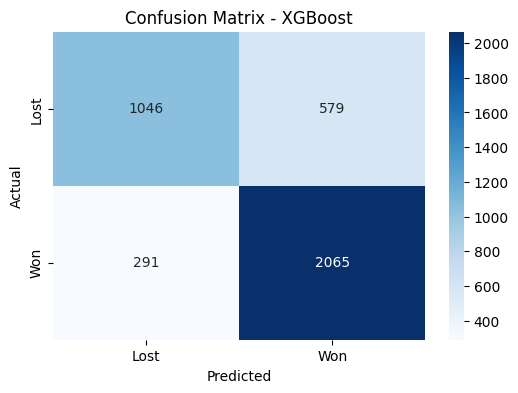

In [10]:
#XGBoost

# Train an XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nAccuracy:", xgb_accuracy)

# ROC AUC Score
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_prob)
print("\nROC AUC Score:", xgb_roc_auc)

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("\nConfusion Matrix:")
print(xgb_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

### SVM

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.38      0.48      1625
           1       0.67      0.86      0.75      2356

    accuracy                           0.67      3981
   macro avg       0.66      0.62      0.62      3981
weighted avg       0.66      0.67      0.64      3981


Accuracy: 0.6651595076613916

ROC AUC Score: 0.7000036567846416

Confusion Matrix:
[[ 612 1013]
 [ 320 2036]]


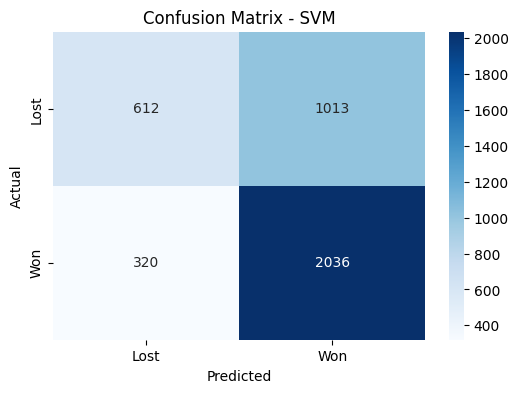

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test_scaled)
svm_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nAccuracy:", svm_accuracy)

# ROC AUC Score
svm_roc_auc = roc_auc_score(y_test, svm_pred_prob)
print("\nROC AUC Score:", svm_roc_auc)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
print("\nConfusion Matrix:")
print(svm_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


### Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1625
           1       0.65      0.76      0.70      2356

    accuracy                           0.61      3981
   macro avg       0.59      0.58      0.58      3981
weighted avg       0.60      0.61      0.60      3981


Accuracy: 0.6144184878171314

ROC AUC Score: 0.653811544991511

Confusion Matrix:
[[ 654  971]
 [ 564 1792]]


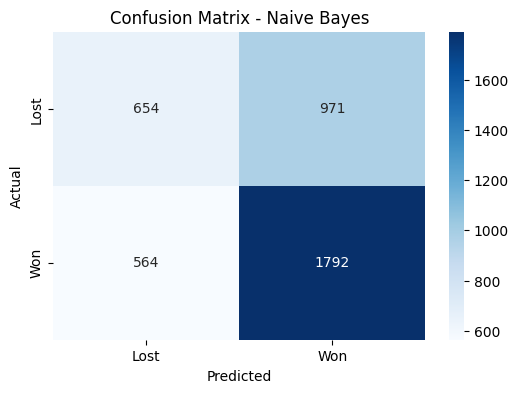

In [12]:
from sklearn.naive_bayes import GaussianNB


# Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_predictions = nb_model.predict(X_test)
nb_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

# Accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nAccuracy:", nb_accuracy)

# ROC AUC Score
nb_roc_auc = roc_auc_score(y_test, nb_pred_prob)
print("\nROC AUC Score:", nb_roc_auc)

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
print("\nConfusion Matrix:")
print(nb_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


### KNN

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      1625
           1       0.69      0.74      0.72      2356

    accuracy                           0.65      3981
   macro avg       0.64      0.63      0.63      3981
weighted avg       0.65      0.65      0.65      3981


Accuracy: 0.6505903039437327

ROC AUC Score: 0.6881281180619041

Confusion Matrix:
[[ 838  787]
 [ 604 1752]]


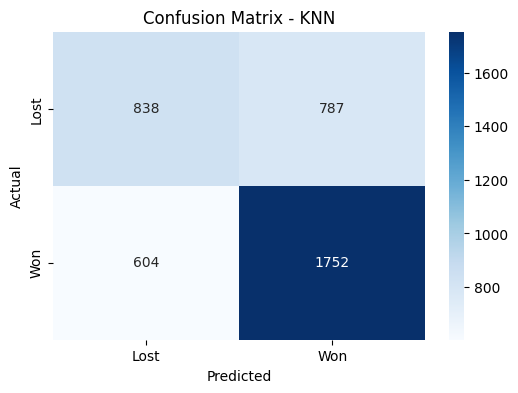

In [13]:
#KNN

from sklearn.neighbors import KNeighborsClassifier


# Initialize and train K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of n_neighbors
knn_model.fit(X_train, y_train)

# Predict and evaluate
knn_predictions = knn_model.predict(X_test)
knn_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("\nAccuracy:", knn_accuracy)

# ROC AUC Score
knn_roc_auc = roc_auc_score(y_test, knn_pred_prob)
print("\nROC AUC Score:", knn_roc_auc)

# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print("\nConfusion Matrix:")
print(knn_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


### LDA - Linear Discriminant Analysis

Linear Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.46      0.51      1625
           1       0.67      0.75      0.71      2356

    accuracy                           0.64      3981
   macro avg       0.62      0.61      0.61      3981
weighted avg       0.63      0.64      0.63      3981


Accuracy: 0.6362722933936197

ROC AUC Score: 0.6760137129424055

Confusion Matrix:
[[ 755  870]
 [ 578 1778]]


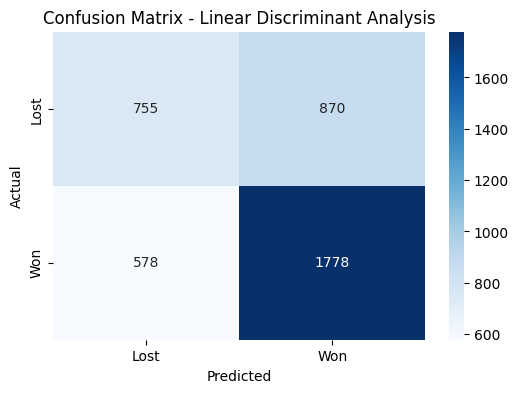

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Linear Discriminant Analysis Classifier
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predict and evaluate
lda_predictions = lda_model.predict(X_test)
lda_pred_prob = lda_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Linear Discriminant Analysis Classification Report:")
print(classification_report(y_test, lda_predictions))

# Accuracy
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("\nAccuracy:", lda_accuracy)

# ROC AUC Score
lda_roc_auc = roc_auc_score(y_test, lda_pred_prob)
print("\nROC AUC Score:", lda_roc_auc)

# Confusion Matrix
lda_cm = confusion_matrix(y_test, lda_predictions)
print("\nConfusion Matrix:")
print(lda_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.show()


### Catboost

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1625
           1       0.76      0.90      0.83      2356

    accuracy                           0.78      3981
   macro avg       0.78      0.75      0.76      3981
weighted avg       0.78      0.78      0.77      3981


Accuracy: 0.7767
ROC AUC Score: 0.8314

Confusion Matrix:
[[ 970  655]
 [ 234 2122]]


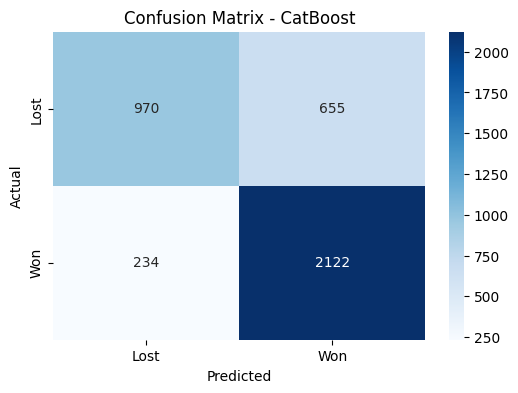

In [15]:
from catboost import CatBoostClassifier

# Initialize and train CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predict on the test set
catboost_predictions = catboost_model.predict(X_test)
catboost_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Evaluate the model
print("CatBoost Classification Report:")
print(classification_report(y_test, catboost_predictions))

# Accuracy
accuracy = catboost_model.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, catboost_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
catboost_cm = confusion_matrix(y_test, catboost_predictions)
print("\nConfusion Matrix:")
print(catboost_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(catboost_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()


## 3. Performance comparison

In [16]:
#Performance comparison

# Example list of models and their predictions (replace these with your actual models and predictions)
models = {
    "Random Forest": (rf_model, rf_predictions, rf_pred_prob),
    "LightGBM": (lgbm_model, lgbm_predictions, lgbm_pred_prob),
    "XGBoost": (xgb_model, xgb_predictions, xgb_pred_prob),
    "Logistic Regression": (log_reg, y_pred, y_pred_prob),
    "Decision Tree": (dt_model, dt_predictions, dt_pred_prob),
    "SVM": (svm_model, svm_predictions, svm_pred_prob),
    "Naive Bayes": (nb_model, nb_predictions, nb_pred_prob),
    "KNN": (knn_model, knn_predictions, knn_pred_prob),
    "LDA": (lda_model, lda_predictions, lda_pred_prob),
    "CatBoost": (catboost_model, catboost_predictions, catboost_pred_prob),
}

# Store metrics for each model
results = {
    "Model": [],
    "Accuracy": [],
    "ROC AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Loop through models and calculate metrics
for model_name, (model, predictions, pred_prob) in models.items():
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, pred_prob)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["ROC AUC"].append(roc_auc)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Print results
print("Model Performance Metrics:")
print(results_df)

# Optional: Save to CSV
# results_df.to_csv('model_performance_metrics.csv', index=False)


Model Performance Metrics:
                 Model  Accuracy   ROC AUC  Precision    Recall  F1-Score
0        Random Forest  0.774177  0.848262   0.777947  0.865450  0.819369
1             LightGBM  0.775433  0.824399   0.767570  0.890068  0.824292
2              XGBoost  0.781462  0.833740   0.781014  0.876486  0.826000
3  Logistic Regression  0.635268  0.673399   0.668155  0.762309  0.712133
4        Decision Tree  0.706858  0.696141   0.751587  0.753820  0.752702
5                  SVM  0.665160  0.700004   0.667760  0.864177  0.753377
6          Naive Bayes  0.614418  0.653812   0.648570  0.760611  0.700137
7                  KNN  0.650590  0.688128   0.690035  0.743633  0.715832
8                  LDA  0.636272  0.676014   0.671450  0.754669  0.710631
9             CatBoost  0.776689  0.831438   0.764134  0.900679  0.826807


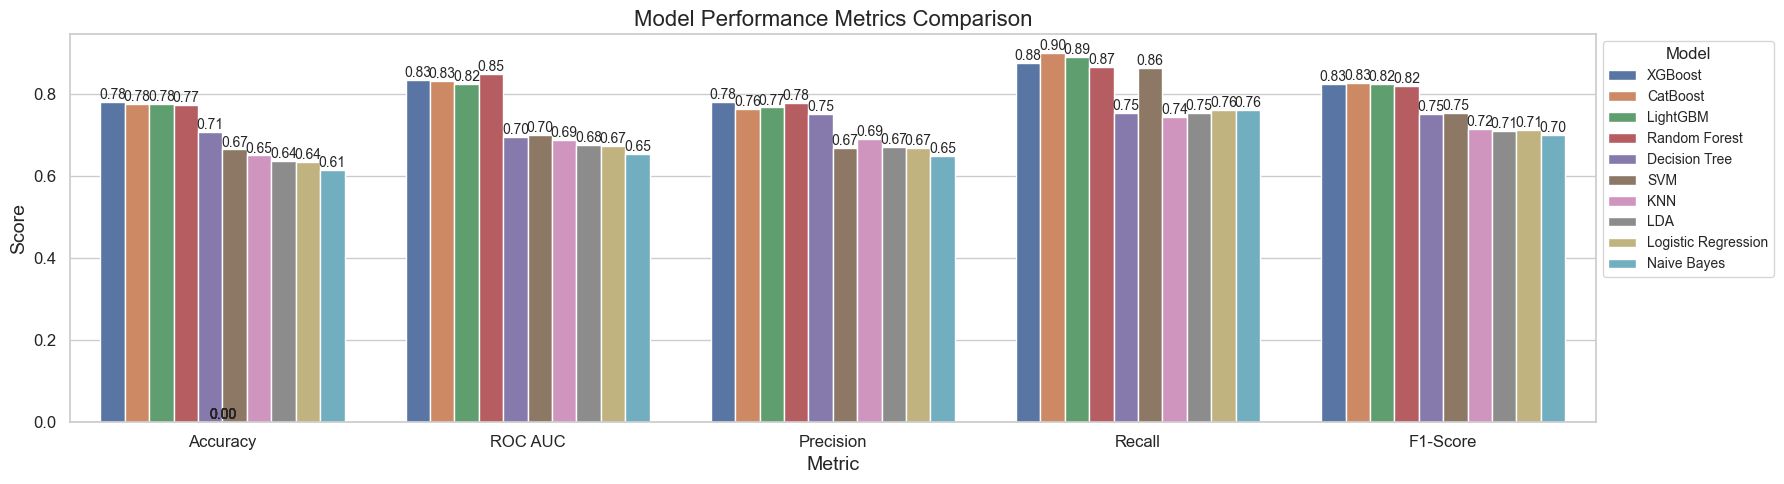

In [17]:
#Performance comparison

# Sort results_df by Accuracy in descending order
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Melt the DataFrame for visualization
results_melted = results_df_sorted.melt(id_vars=["Model"], 
                                        var_name="Metric", 
                                        value_name="Score")

# Set up the figure size and style
plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")

# Create a barplot
ax = sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", order=["Accuracy", "ROC AUC", "Precision", "Recall", "F1-Score"])

# Add numbers above the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha='center', va='center', size=10, xytext=(0, 5), 
                textcoords='offset points')

# Add labels and title
plt.title("Model Performance Metrics Comparison", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend position
plt.legend(title="Model", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


**Analysis**

Top Overall Performers:
- XGBoost and CatBoost: These models show strong performance across all metrics, making them reliable choices. We recommend to choose CatBoost if recall (e.g., minimizing false negatives) is a higher priority and XGBoost for balanced metrics.
- LightGBM: Another top contender, slightly better than others in recall and F1-Score.

Good Trade-Offs:
- Random Forest: High accuracy and ROC AUC, though it lags slightly in recall compared to the best models.

Lower Performance:
- Logistic Regression, Naive Bayes, KNN, and LDA are the weakest performers across the board. These models may not capture the complexity of the data effectively.
